# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score as r2

Загрузим датасет

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
X_train.shape

(404, 13)

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(X_train, columns=column_names)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


Посмотрим визуально на распределения, нет ли явных выбросов

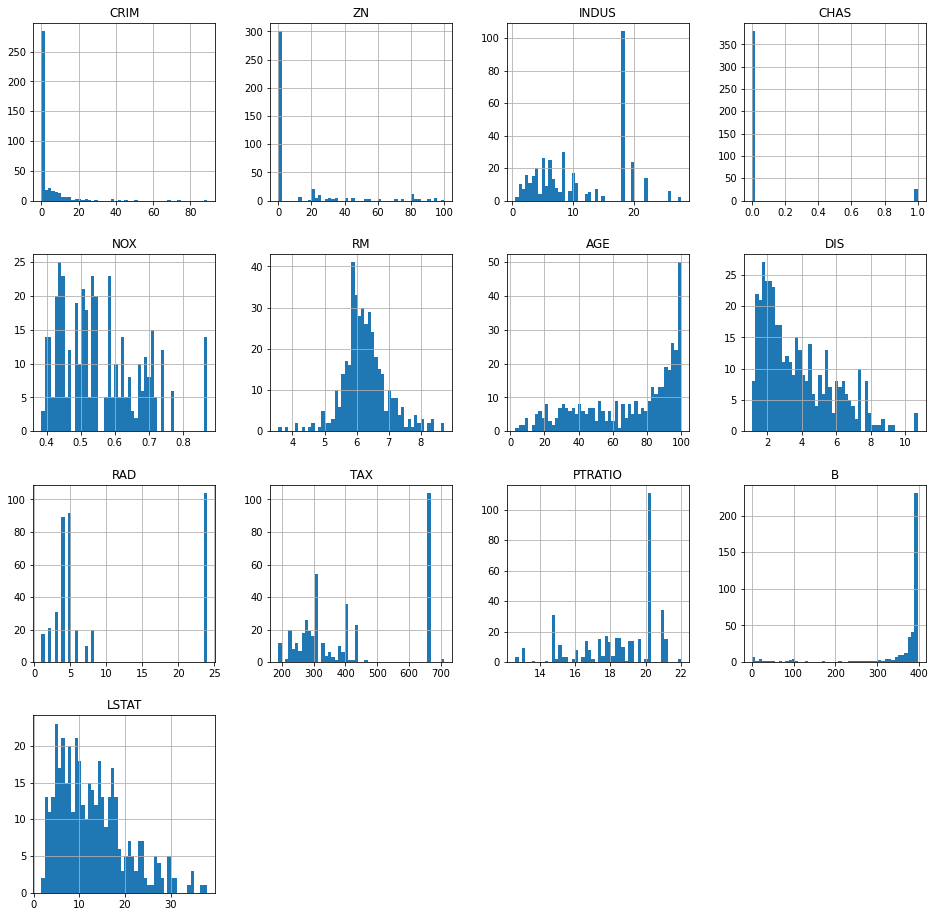

In [6]:
df.hist(figsize=(16,16), bins=50, grid=True)
plt.show()

Многие распределения имеют странный вид, но явных выбросов нет.

Приведем все фичи к масштабу 0, 1 с помощью MinMaxScaler()

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
df = pd.DataFrame(X_train, columns=column_names)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.042023,0.103864,0.0,0.000844,0.002951,0.041233,1.0
ZN,404.0,0.114802,0.237677,0.0,0.000000,0.000000,0.125000,1.0
INDUS,404.0,0.390192,0.249681,0.0,0.171188,0.338343,0.646628,1.0
CHAS,404.0,0.061881,0.241238,0.0,0.000000,0.000000,0.000000,1.0
NOX,404.0,0.354642,0.241344,0.0,0.139918,0.314815,0.506173,1.0
RM,404.0,0.524028,0.137449,0.0,0.448054,0.510747,0.590240,1.0
AGE,404.0,0.680851,0.287751,0.0,0.438465,0.778579,0.939238,1.0
DIS,404.0,0.272493,0.211907,0.0,0.098897,0.210079,0.416295,1.0
RAD,404.0,0.366982,0.378190,0.0,0.130435,0.173913,1.000000,1.0
TAX,404.0,0.416632,0.318116,0.0,0.173996,0.271511,0.913958,1.0


In [9]:
df_test = pd.DataFrame(X_test, columns=column_names)
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,0.034686,0.060392,0.000076,0.000883,0.002503,0.042409,0.281441
ZN,102.0,0.109020,0.215729,0.000000,0.000000,0.000000,0.162500,0.900000
INDUS,102.0,0.396074,0.259683,0.027859,0.183101,0.342192,0.646628,1.000000
CHAS,102.0,0.098039,0.298836,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,102.0,0.327481,0.226367,0.014403,0.124486,0.302469,0.460905,1.000000
RM,102.0,0.540890,0.130197,0.255422,0.465724,0.516654,0.595033,1.010651
AGE,102.0,0.658589,0.299022,0.031926,0.407312,0.729660,0.927652,1.000000
DIS,102.0,0.300853,0.248413,0.035060,0.103101,0.229133,0.432855,1.147818
RAD,102.0,0.390452,0.381397,0.000000,0.130435,0.173913,1.000000,1.000000
TAX,102.0,0.438815,0.339179,-0.001912,0.174474,0.271511,0.913958,1.000000


In [11]:
X_train.shape

(404, 13)

В качестве основной архитектуры выберем 3-х слойную сеть, и подберем количество нейронов для нее.

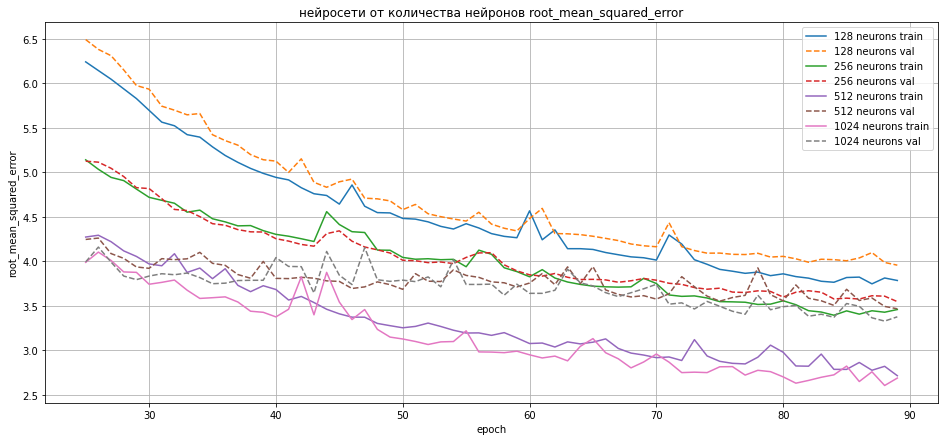

In [27]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 90
# вектор для выводв результатов
epoch = np.arange(epochs)

for n_neurons in [128, 256, 512, 1024]:

    modeli = Sequential([
                      Dense(n_neurons, activation='relu', input_shape=(13,)),
                      Dense(n_neurons, activation='relu'),
                      Dense(1, activation='linear'),
                      ])

    modeli.compile(
      optimizer='adam',
      loss='mean_squared_error',
      metrics=[RootMeanSquaredError()],
      )

    # проводим обучение модели 
    hh = modeli.fit(
                  X_train,
                  y_train,
                  epochs=epochs,
                  batch_size=40, validation_split=0.2, verbose = 0
                  )
    # картинки
    plt.plot(epoch[25:],hh.history['root_mean_squared_error'][25:],'-',label = f'{n_neurons} neurons' +' train')
    plt.plot(epoch[25:],hh.history['val_root_mean_squared_error'][25:],'--',label = f'{n_neurons} neurons' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов root_mean_squared_error')
plt.xlabel('epoch')
plt.ylabel('root_mean_squared_error')
plt.show()

Видно, что сеть с 512 и 1024 нейронами в слое сильно переобучается, а обучение с 256 нейронами идет более плавно, без сильного переобучения, и есть еще некий задел на дообучение.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Инициализируем сеть и сохраним ее начальные веса для дальнейших экспериментов

In [46]:
model = Sequential([
                      Dense(256, activation='relu', input_shape=(13,)),
                      Dense(256, activation='relu'),
                      Dense(1, activation='linear'),
                      ])

model.save_weights('/content/drive/My Drive/GeekBrains/NeuralNetworkIntro/hw3_model.h5')

Поэкспериментируем с различными оптимизаторами

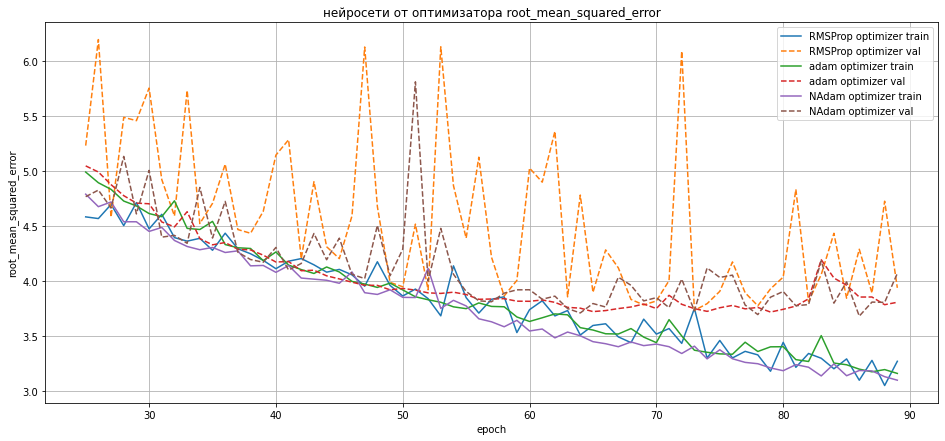

In [52]:
plt.figure(figsize=(16,7))
# число рабочих эпох
epochs = 90
# вектор для выводв результатов
epoch = np.arange(epochs)

# будем изменять оптимизаторы

result_dict = {}
for i_optim in ['RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(256, activation='relu', input_shape=(13,)),
                      Dense(256, activation='relu'),
                      Dense(1, activation='linear'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('/content/drive/My Drive/GeekBrains/NeuralNetworkIntro/hw3_model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='mean_squared_error',
      metrics=[RootMeanSquaredError()],
      )
    
    # проводим обучение модели 
    hh = modeli.fit(
                  X_train,
                  y_train,
                  epochs=epochs,
                  batch_size=40, validation_split=0.2, verbose = 0
                  )
    
    hh_test = modeli.evaluate(X_test, y_test, verbose = 0)
    result_dict[i_optim] = hh_test[1]
    # картинки
    plt.plot(epoch[25:],hh.history['root_mean_squared_error'][25:],'-',label = f'{i_optim} optimizer' +' train')
    plt.plot(epoch[25:],hh.history['val_root_mean_squared_error'][25:],'--',label = f'{i_optim} optimizer' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора root_mean_squared_error')
plt.xlabel('epoch')
plt.ylabel('root_mean_squared_error')
plt.show()

Лучше всего проявляет себя 'Adam' - более плавное обучение.

Теперь попробуем взять разные активационные функции

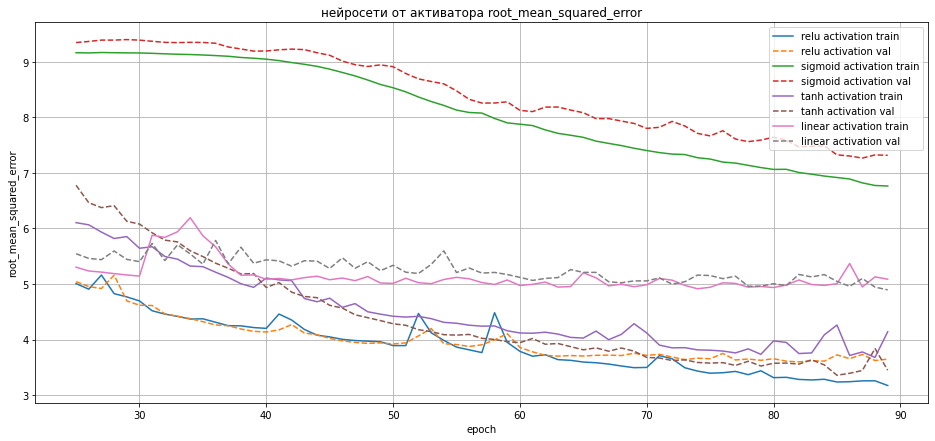

In [55]:
plt.figure(figsize=(16,7))
# число рабочих эпох
epochs = 90
# вектор для выводв результатов
epoch = np.arange(epochs)

# будем изменять оптимизаторы

for act in ['relu', 'sigmoid', 'tanh', 'linear']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(256, activation=act, input_shape=(13,)),
                      Dense(256, activation=act),
                      Dense(1, activation='linear'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('/content/drive/My Drive/GeekBrains/NeuralNetworkIntro/hw3_model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer='adam',
      loss='mean_squared_error',
      metrics=[RootMeanSquaredError()],
      )
    
    # проводим обучение модели 
    hh = modeli.fit(
                  X_train,
                  y_train,
                  epochs=epochs,
                  batch_size=40, validation_split=0.2, verbose = 0
                  )
    
    hh_test = modeli.evaluate(X_test, y_test, verbose = 0)
    result_dict[act] = hh_test[1]
    # картинки
    plt.plot(epoch[25:],hh.history['root_mean_squared_error'][25:],'-',label = f'{act} activation' +' train')
    plt.plot(epoch[25:],hh.history['val_root_mean_squared_error'][25:],'--',label = f'{act} activation' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от активатора root_mean_squared_error')
plt.xlabel('epoch')
plt.ylabel('root_mean_squared_error')
plt.show()

Лучше всего себя проявили 'relu' и 'tanh'.

Теперь посмотрим результирующий список с конечной метрикой на тесте (я выбрал RMSE из-за удобства интерпретации).

In [59]:
result_table = pd.Series(result_dict)
result_table.sort_values(ascending=False)

sigmoid    6.586407
NAdam      5.689888
RMSProp    5.470566
tanh       5.440660
adam       5.340400
relu       5.180808
linear     4.927080
dtype: float64

Удивительно, но на тесте лучше всего себя проявила линейная функция активации (по сути дела, отсутствие функции активации). Видимо, распределение фичей на тесте и на трейне с валидом статистически отличаются.

In [88]:
model = Sequential([
                      Dense(256, activation='linear', input_shape=(13,)),
                      Dense(256, activation='linear'),
                      Dense(1, activation='linear'),
                      ])

model.load_weights('/content/drive/My Drive/GeekBrains/NeuralNetworkIntro/hw3_model.h5')

model.compile(
      optimizer='adam',
      loss='mean_squared_error',
      metrics=[RootMeanSquaredError()],
      )

hh = model.fit(
                  X_train,
                  y_train,
                  epochs=90,
                  batch_size=40, validation_split=0.2, verbose = 0
                  )

In [89]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.reshape(1, -1)[0]
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.reshape(1, -1)[0]

In [90]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    train_min = train_true_values.min()
    train_max = train_true_values.max()
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.plot([train_min, train_max], [train_min, train_max], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.plot([train_min, train_max], [train_min, train_max], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Визуализируем результаты предсказаний на трейне и тесте:

Train R2:	0.72
Test R2:	0.71


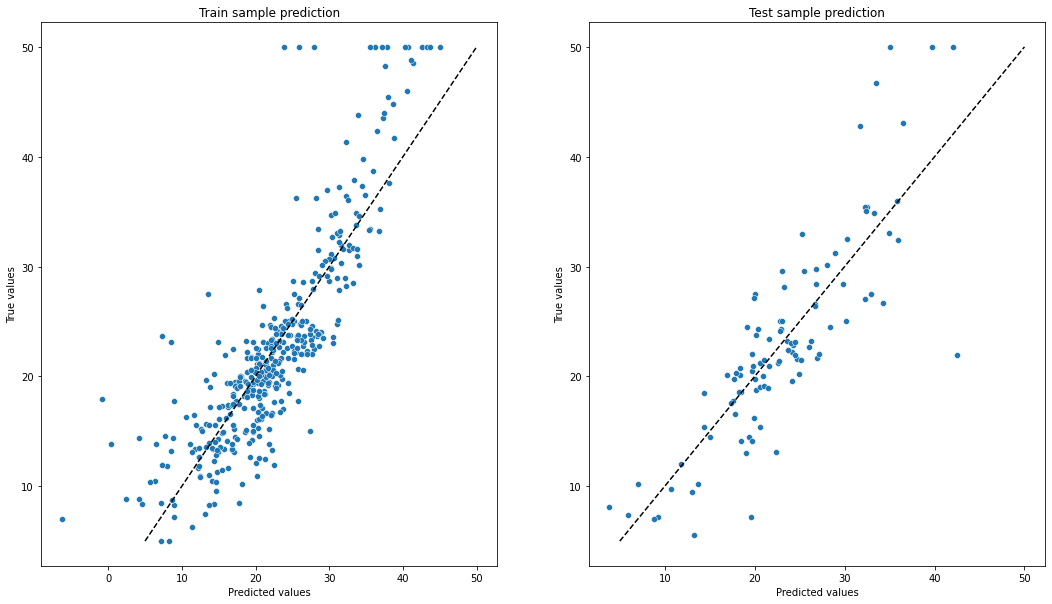

In [91]:
evaluate_preds(y_train, y_train_pred, y_test, y_test_pred)

Распределения похожи, переобучения нет - коэффициент детерменации практически равен на трейне и тесте. Но в целом, результат очень странный. Во всех слоях стоит линейная функция активации, т.е., фактически мы из нейросети получили обычную линейную регрессию. И она справляется лучше, чем классическая нейронная сеть.